# <font size="8" face="algerian" color="#D23C22">Exploration Data Analysis</font>


In [28]:
# Importing the needed libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
import ast

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Loading And Cleaning the datta

### Loading the data

In [5]:
# Load the data
data_loaded = pd.read_csv(r'C:\Users\mkhov\Desktop\Jupyter_Notebooks\Python_Github_projects\Python_Data_Analyst_Job_Postings_Analysis_2023\Data\data_jobs.csv')

# Filter Data for Data Analyst Jobs listed in the United States
df_USA = data_loaded[(data_loaded['job_country'] == 'United States') &
                     (data_loaded['job_title_short'] == 'Data Analyst')].copy()


# View the head of the data
df_USA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"['r', 'zoom']","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"['word', 'excel', 'powerpoint', 'outlook']","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"['sas', 'sas', 'word', 'excel']","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"['oracle', 'azure', 'power bi', 'excel', 'word...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [6]:
# Getting an info on the data
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        67816 non-null  object 
 1   job_title              67816 non-null  object 
 2   job_location           67582 non-null  object 
 3   job_via                67809 non-null  object 
 4   job_schedule_type      67107 non-null  object 
 5   job_work_from_home     67816 non-null  bool   
 6   search_location        67816 non-null  object 
 7   job_posted_date        67816 non-null  object 
 8   job_no_degree_mention  67816 non-null  bool   
 9   job_health_insurance   67816 non-null  bool   
 10  job_country            67816 non-null  object 
 11  salary_rate            8442 non-null   object 
 12  salary_year_avg        4350 non-null   float64
 13  salary_hour_avg        3980 non-null   float64
 14  company_name           67816 non-null  object 
 15  job_s

### Cleaning the data

In [7]:
# From the info viewed, the job_posted_date column is showed as an object which means is a string
# We will transform the date column to have datetime as a data type

df_USA['job_posted_date'] = pd.to_datetime(df_USA['job_posted_date'])

# Adding a month column to the data
df_USA['job_posted_month'] = df_USA['job_posted_date'].dt.month_name()
df_USA['job_posted_day'] = df_USA['job_posted_date'].dt.day_name()
# Viewing the head of the data
df_USA.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,November,Monday
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"['r', 'zoom']","{'programming': ['r'], 'sync': ['zoom']}",March,Friday


In [8]:
# Checking the data type of the job_skills
print("The data type of the job_skills column is:",type(df_USA['job_skills'][68]))

# Viewing the values under job_skills we are suppose to have a list (68 because that is the first None NA value)
# Cleaning the data job_skills values

df_USA['job_skills'] = df_USA['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# View the head of the data
df_USA.head()

The data type of the job_skills column is: <class 'str'>


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_day
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN,November,Monday
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}",March,Friday
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin...",June,Friday
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p...",August,Monday
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'...",June,Saturday


In [9]:
# Getting info on the data again
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

### Missing Values

In [10]:
print('Length of the actual data is:', df_USA.shape)
print(" ")
print('Number of Missing values are: ')
print(df_USA.isna().sum())

Length of the actual data is: (67816, 19)
 
Number of Missing values are: 
job_title_short              0
job_title                    0
job_location               234
job_via                      7
job_schedule_type          709
job_work_from_home           0
search_location              0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
salary_rate              59374
salary_year_avg          63466
salary_hour_avg          63836
company_name                 0
job_skills               10425
job_type_skills          10425
job_posted_month             0
job_posted_day               0
dtype: int64


### Unique Values

In [11]:
# Dropping the job_type_skills and job_skills variables
df_USA.drop(labels=['job_type_skills','job_skills'], axis=1).nunique()


job_title_short              1
job_title                20020
job_location              3220
job_via                   1438
job_schedule_type           31
job_work_from_home           2
search_location              6
job_posted_date          58751
job_no_degree_mention        2
job_health_insurance         2
job_country                  1
salary_rate                  5
salary_year_avg           1024
salary_hour_avg            617
company_name             17724
job_posted_month            12
job_posted_day               7
dtype: int64

#### Insights should be here

## Statistical Analysis and Visualization

In [12]:
# Extracting the Numeriacal Entries

df_USA_numeric = df_USA.select_dtypes(include = ['float64'])

# Viewing the variable names
df_USA_numeric.columns.tolist()

['salary_year_avg', 'salary_hour_avg']

In [13]:
# Extracting the Categorical variables

df_USA_categorical = df_USA.select_dtypes(include = ['object','bool']).dropna()

df_USA_categorical.columns.tolist()

['job_title_short',
 'job_title',
 'job_location',
 'job_via',
 'job_schedule_type',
 'job_work_from_home',
 'search_location',
 'job_no_degree_mention',
 'job_health_insurance',
 'job_country',
 'salary_rate',
 'company_name',
 'job_skills',
 'job_type_skills',
 'job_posted_month',
 'job_posted_day']

### Descriptive Analysis

In [14]:
# Some description the on the numerical variables
df_USA_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary_year_avg,4350.0,94553.964924,33248.650655,25000.0,71262.5,90000.0,112500.0,375000.0
salary_hour_avg,3980.0,38.312172,18.758708,8.0,24.0,33.0,50.0,391.0


In [15]:
# Some description on the categorical variables

# The job skills column were droped because the contain list and dictionaries as entries,
# hence they will be treated separately
df_USA_categorical.drop(labels=['job_type_skills', 'job_skills'], axis=1).describe().transpose()

,count,unique,top,freq
job_title_short,7146,1,Data Analyst,7146
job_title,7146,3246,Data Analyst,1846
job_location,7146,1046,Anywhere,965
job_via,7146,255,via Indeed,1633
job_schedule_type,7146,22,Full-time,5106
job_work_from_home,7146,2,False,6181
search_location,7146,6,"New York, United States",2246
job_no_degree_mention,7146,2,False,5240
job_health_insurance,7146,2,False,3983
job_country,7146,1,United States,7146


In [16]:
# Description of the Job_skills column
print(df_USA_categorical['job_skills'].explode('job_skills').describe())

count     29718
unique      181
top         sql
freq       4307
Name: job_skills, dtype: object


## Univariate Analysis

In [17]:
# Drop all NAs values in the salary_year_avg columns
df_USA_numeric = df_USA_numeric.dropna(subset=['salary_year_avg']).drop('salary_hour_avg', axis=1)

df_USA_numeric

,salary_year_avg
109,89000.0
180,90250.0
410,133285.0
988,62623.0
1413,71300.0
...,...
782637,70000.0
782798,111175.0
783588,125000.0
783866,115000.0


In [18]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.

    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.

    The approach is explained further in the :ref:`user guide <tutorial_kde>`.

    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially when drawing mu

Descriptive of the salary_year_avg Variable
-------------------------------------


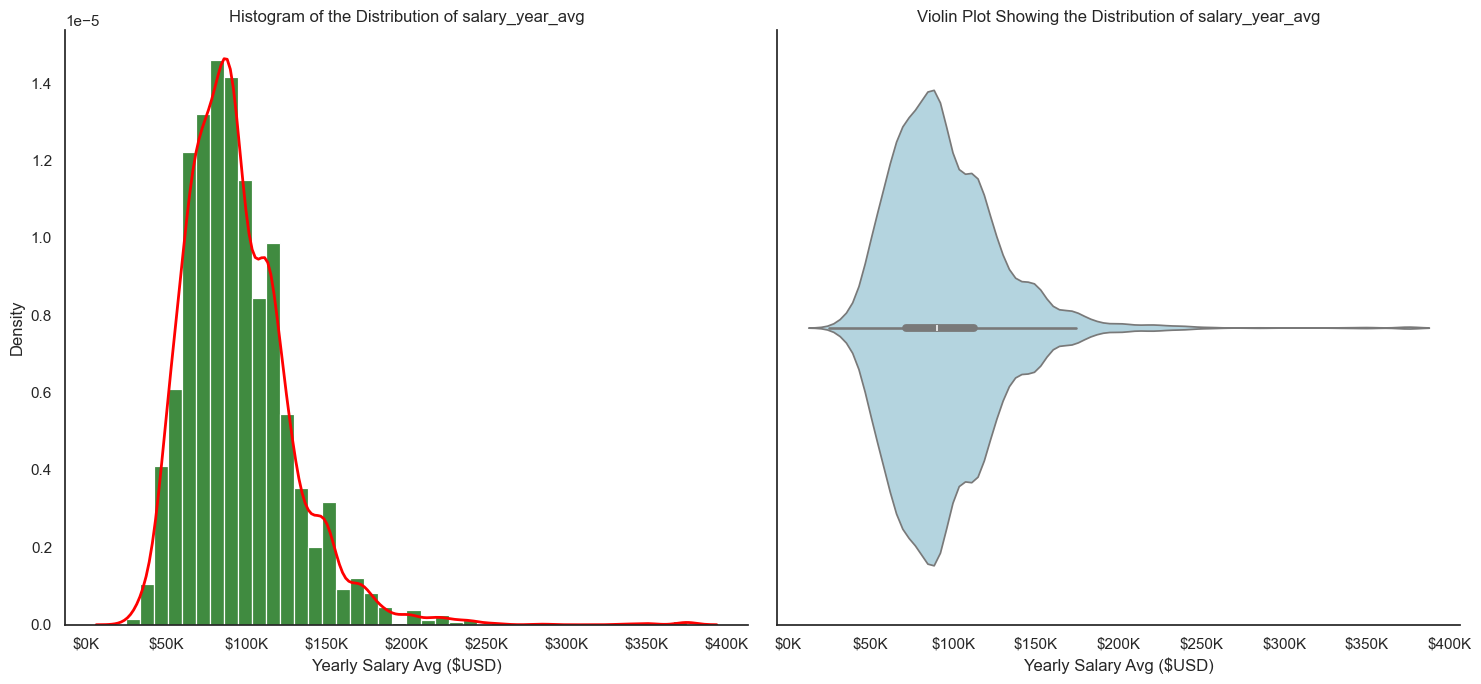

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a function to plot the distribution of the numeric variables
# Setting the theme and a color palette
sns.set_theme(style='white')
color_palette = ['darkgreen','red','lightblue']  # Customize the color palette

def df_numeric_visual(column, bin):
    print('Descriptive of the', column, 'Variable')
    print("-------------------------------------")
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    
    # Creating the histogram plot (only the histogram part)
    sns.histplot(data=df_USA_numeric[column], bins=bin, ax=ax[0], color=color_palette[0], stat='density')
    
    # Overlay the KDE plot separately with its own color
    sns.kdeplot(data=df_USA_numeric[column], ax=ax[0], color=color_palette[1], linewidth=2)
    
    # Customizing histogram
    ax[0].set_title("Histogram of the Distribution of " + column)
    ax[0].set_xlabel('Yearly Salary Avg ($USD)')
    ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    
    # Creating the violin plot with custom color
    sns.violinplot(data=df_USA_numeric[column], ax=ax[1], orient='h', color=color_palette[2])
    sns.despine()
    
    # Customizing violin plot
    ax[1].set_title('Violin Plot Showing the Distribution of ' + column)
    ax[1].set_xlabel('Yearly Salary Avg ($USD)')
    ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    
    # Ensure tight layout
    plt.tight_layout()

# Iterate through each column and plot
for data in df_USA_numeric:
    df_numeric_visual(data, bin=40)


#### Investigate the Outliners


In [27]:
# A list of variables under study
df_USA_cat_bool_list = df_USA_categorical[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

# Creating a function to display the counts and percentage

def bool_pie_chart(col):
    print('Distribution of the',col,"variable")
    print("_ "*50)
    value_counts = df_USA_cat_bool_list[col].value_counts()
    
    # Donut chart
    percentage = round((value_counts/value_counts.sum())*100,1)
    fig = px.pie(values=percentage, names=value_counts.index,
             title=("Pie Chart Showing the Count for "+col), color_discrete_sequence= ['darkgreen','darkblue'],
             labels={'names':'Categories'}, hole = 0.5)
    fig.update_layout(legend = dict(x = 0.9, y = 0.5))
    fig.show()
    

for col in df_USA_cat_bool_list:
    bool_pie_chart(col)



Distribution of the job_work_from_home variable
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Distribution of the job_no_degree_mention variable
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Distribution of the job_health_insurance variable
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


In [38]:
df_USA_cat_object_list = df_USA_categorical[['job_title', 'job_location','job_via','job_schedule_type',
                                             'job_posted_month', 'job_posted_day','search_location']]

def objects_funnel_chart(col):
    # Creating the funnel chart
    print(" ")
    print('Distribution of the top 10 ' + col)
    print('_ '*60)
    top_10 = df_USA_cat_object_list[col].value_counts().head(10)
    
    fig = go.Figure(go.Funnel(x = top_10.values, y = top_10.index,
                           marker = {'color':px.colors.sequential.BuPu_r}))
    fig.update_layout(title = 'Top 10 ' + col + ' Distribution', template = 'plotly_white')
    
    fig.show()

for i in df_USA_cat_object_list:
    objects_funnel_chart(i)

 
Distribution of the top 10 job_title
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 job_location
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 job_via
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 job_schedule_type
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 job_posted_month
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 job_posted_day
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


 
Distribution of the top 10 search_location
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


In [22]:
# Top 10 Countries contribution
top_10_skills = df_USA_categorical[['job_skills']].explode('job_skills').groupby(by = 'job_skills').size().sort_values(ascending = False).head(10)

# Creating the funnel chart
fig = go.Figure(go.Funnel(x = top_10_skills.values, y = top_10_skills.index,
                           marker = {'color':px.colors.sequential.BuPu_r}))
fig.update_layout(title = 'Top 10 Country Distribution', template = 'plotly_white')

fig.show()

#### Insights should go here